### **SECTION #1**  
#### September 9, 2022

*Create a copy of this Jupyter notebook in your own folder.*

# Table of Contents
1. [Lecture recap](#Lecture-recap)
1. [Using R for data visualization](#Using-R-for-data-visualization)
1. [Exercises](#Exercises)

## Lecture Recap

On Tuesday and Thursday, we discussed how important __visuals__ and __descriptive statistics__ are to communicating your analyses. 

For instance, we saw evidence of racially biased policing in New York by illustrating how police in almost every precinct were more likely to recover a weapon when stopping a white pedestrian than a black pedestrian, indicating a higher bar of suspicion to stop white pedestrians.

To analyze our data, we always need to manipulate it in some way, shape, or form:


Five key tidyverse functions for data manipulation in R:

1. `filter`: subset observations (rows) based on some condition
    * Example 1: keep only the precincts in Manhattan
    * Example 2: keep only the precincts with high crime rates
2. `select`: subset columns (variables)
    * Example: keep only the precinct number and white hit rate
3. `mutate`: add or modify variables
    * Example 1: calculate the difference in hit rates in each precinct
    * Example 2: calculate the ratio of hit rates in each precinct
4. `summarize`: collapse multiple values into a single value
    * Example: calculate the mean, median, and standard deviation of black and white hit rates
5. `arrange`: sort observations based on some criterion
    * Example: sort precincts by the white-black hit rate difference

The `group_by` function is also essential! It allows you to group your data so that you can calculate statistics for each group of observations. 

For example, if each observation in your data is a stop, you could calculate the hit rate by precinct by grouping by precinct and calculating the proportion of stops that yield a weapon by taking the average of a binary variable that is TRUE (1) if a weapon is recovered and FALSE (0) otherwise.

In [148]:
# Simulate stop data
set.seed(1)
n <- 50000
stop_data <- tibble(
    precinct = sample(1:77, n, T),
    weapon = ifelse(rbinom(n, 1, precinct / 200) == 1, TRUE, FALSE)
)

head(stop_data)

precinct,weapon
<int>,<lgl>
68,FALSE
39,FALSE
1,FALSE
34,FALSE
43,FALSE
14,TRUE


In [150]:
stop_data %>%
    group_by(precinct) %>%
    summarize(hit_rate = mean(weapon)) %>%
    arrange(desc(hit_rate)) %>% 
    head()

precinct,hit_rate
<int>,<dbl>
75,0.3964111
76,0.3959938
77,0.3914422
71,0.3796875
74,0.3712480
70,0.3665644


### Measures of Central Tendency
While aggregating data is useful, we have to keep in mind that the statistics we choose are not necessarily sufficient to describe the data in full.

__Mean__ and __Median__ are both measures of central tendancy, but can vary significantly.

The __median__ is the number above and below which half of observations fall. For example, the median weekly earnings of workers in the US was about \\$1000 in 2021, so half of workers earned less and the other half earned more. This doesn't tell us __anything__ about how much more though. The median would be the same if everyone earning below \\$1000 earned \\$1 or \\$999.

The __mean__ is impacted by how far away all points are from the center. This can be good because the magnitudes of differences influence the mean. However, this can also give us a poor measure of centrality for heavily __skewed__ data.

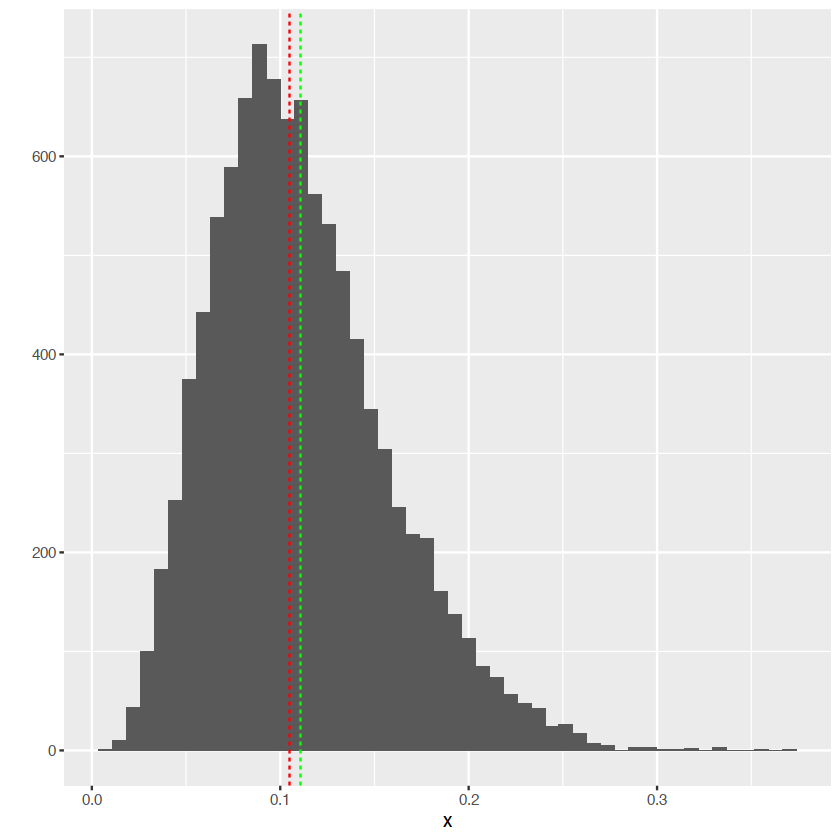

In [198]:
# Plot a skewed distribution
set.seed(1)
x <- rbeta(10000, 5, 40)

qplot(x, bins = 50) +
    geom_vline(xintercept = median(x),
              linetype = "dashed",
              color = "red") +
    geom_vline(xintercept = mean(x),
              linetype = "dashed",
              color = "green")



If our data is heavily skewed or has a few outliers that are much greater or less than most observations, we may want to drop these outliers. However, it is important to think about the ramifications of doing so. If those outliers do not fit within our theory of the world, we should consider if the theory is what needs to be revised instead of the dataset!

Some areas of research are also particularly interested in exceptional cases. For example, the vast majority of patents have little intrinsic value. Occasionally this isn't the case. Take for example US patent no. 174,465.

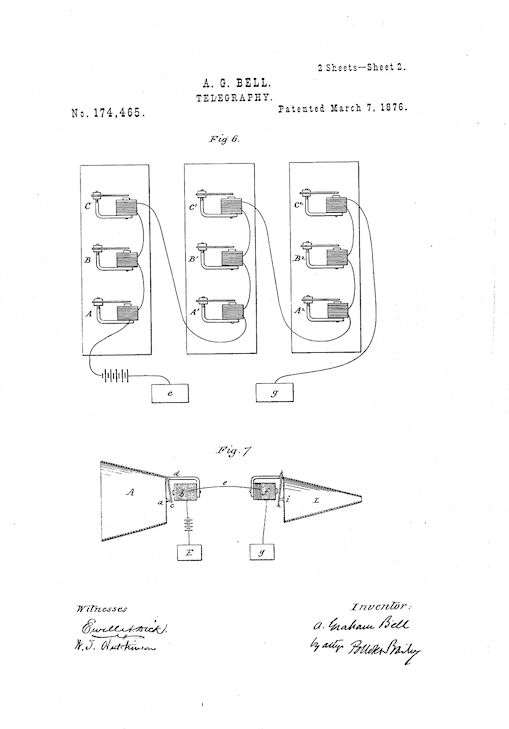

This is arguably the most valuable patent of all time. It recognized Alexander Graham Bell as the inventor of the telephone, spawning one of the largest mega-corporations in American history (Bell Systems), which was eventually broken up into numerous service providers. 

The point here is that we need to think carefully about removing outliers like this. If we are assessing the value of intellectual property rights, it may not be principled to remove the foremost examples of their importance!

### Measures of Spread

The __variance__ is the average of squared differences between each observation $x_i$ and the average of observations $\bar{x} = \frac{1}{n} \sum_{i = 1}^n x_i$.

$$s^2 = \frac{1}{n - 1} \sum_{i=1}^n (x_i - \bar{x})^2$$

The idea of the variance is that as the spread of the data increases (values increase if greater than the mean or decrease if less than the mean) the squared deviations $(x_i - \bar{x})^2$ always increase. So greater variance corresponds to greater spread of the data. However, the variance is in terms of squared units. So if the variable is in terms of dollars, the variance is in dollars squared.

Therefore, rather than report the variance, we normally report its square root, the __standard deviation__, which is in the original units.

$$s = \sqrt{\frac{1}{n - 1} \sum_{i=1}^n (x_i - \bar{x})^2}$$

If the standard deviation of weekly earnings is 1000, we can say its standard deviation is $1,000.


### Correlation
Up until now, we've been focusing on one variable in isolation. But often we are interested in how multiple variables relate. __Correlation__ can be a useful measure of just this. For variables x and y with standard deviations $s_x$ and $s_y$, respectively, the correlation is given by the following:

$$ r = \frac{1}{n} \sum_{i = 1}^n \Bigg(\frac{x_i - \bar{x}}{s_x}\Bigg) \Bigg(\frac{y_i - \bar{y}}{s_y}\Bigg)$$

The intuition for this formula is that if $x_i$ is much greater than its mean and $y_i$ is much greater than its mean, then the product of those two numbers will be positive. The same is the case if they are both less than their means. In that case, the variables will be __positively correlated__.

However, if when $x_i$ is much greater than its mean then $y_i$ tends to be much less, then their product will be negative. The same is the case if $x_i$ is much less than its mean and $y_i$ is much more than its mean. In this case the variables will be __negatively correlated__ 

Note that correlation is unit-less. It can't be interpreted in terms of dollars or test scores or any of that jazz. However, this means that it CAN be directly compared across different variables regardless of the units they are in. 


## Using R for data visualization

### Intergenerational mobility

In [116]:
# We start by loading the data
# from https://onlinelibrary.wiley.com/doi/epdf/10.3982/ECTA17018
library(tidyverse)
mobility <-
  tribble(
    ~country,       ~mean, ~districts, ~median, ~sd,   ~min,   ~max,
    "South Africa", 0.79,  216,        0.8,     0.075, 0.555,  0.896,
    "Botswana",     0.7,   23,         0.714,   0.079, 0.554,  0.909,
    "Zimbabwe",     0.63,  88,         0.726,   0.148, 0.4,    1,
    "Nigeria",      0.64,  37,         0.765,   0.201, 0.33,   0.963,
    "Egypt",        0.65,  236,        0.694,   0.105, 0.418,  0.914,
    "Tanzania",     0.6,   113,        0.611,   0.094, 0.408,  0.854,
    "Ghana",        0.58,  110,        0.65,    0.158, 0.181,  0.82,
    "Cameroon",     0.52,  230,        0.588,   0.203, 0.088,  0.896,
    "Kenya",        0.45,  173,        0.514,   0.187, 0.048,  0.873,
    "Zambia",       0.49,  72,         0.467,   0.127, 0.284,  0.785,
    "Morocco",      0.43,  59,         0.424,   0.145, 0.16,   0.723,
    "Lesotho",      0.44,  10,         0.437,   0.06,  0.317,  0.492,
    "Uganda",       0.37,  161,        0.382,   0.128, 0.015,  0.696,
    "Benin",        0.41,  77,         0.381,   0.132, 0.111,  0.649,
    "Rwanda",       0.29,  30,         0.28,    0.063, 0.22,   0.469,
    "Senegal",      0.29,  34,         0.209,   0.164, 0.078,  0.616,
    "Sierra Leone", 0.26,  107,        0.185,   0.149, 0.032,  0.694,
    "Ethiopia",     0.13,  97,         0.119,   0.235, 0,      0.865,
    "Malawi",       0.16,  227,        0.163,   0.115, 0.052,  0.643,
    "Liberia",      0.22,  47,         0.18,    0.08,  0.034,  0.345,
    "Guinea",       0.23,  34,         0.179,   0.085, 0.063,  0.491,
    "Sudan",        0.11,  129,        0.097,   0.144, 0.001,  0.551,
    "Mali",         0.21,  242,        0.128,   0.096, 0.013,  0.578,
    "Burkina Faso", 0.17,  45,         0.123,   0.08,  0.029,  0.526,
    "Mozambique",   0.1,   144,        0.064,   0.086, 0.015,  0.707,
    "South Sudan",  0.04,  72,         0.024,   0.056, 0,      0.319
  )

In [117]:
head(mobility)

country,mean,districts,median,sd,min,max
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
South Africa,0.79,216,0.800,0.075,0.555,0.896
Botswana,0.70,23,0.714,0.079,0.554,0.909
Zimbabwe,0.63,88,0.726,0.148,0.400,1.000
Nigeria,0.64,37,0.765,0.201,0.330,0.963
Egypt,0.65,236,0.694,0.105,0.418,0.914
Tanzania,0.60,113,0.611,0.094,0.408,0.854


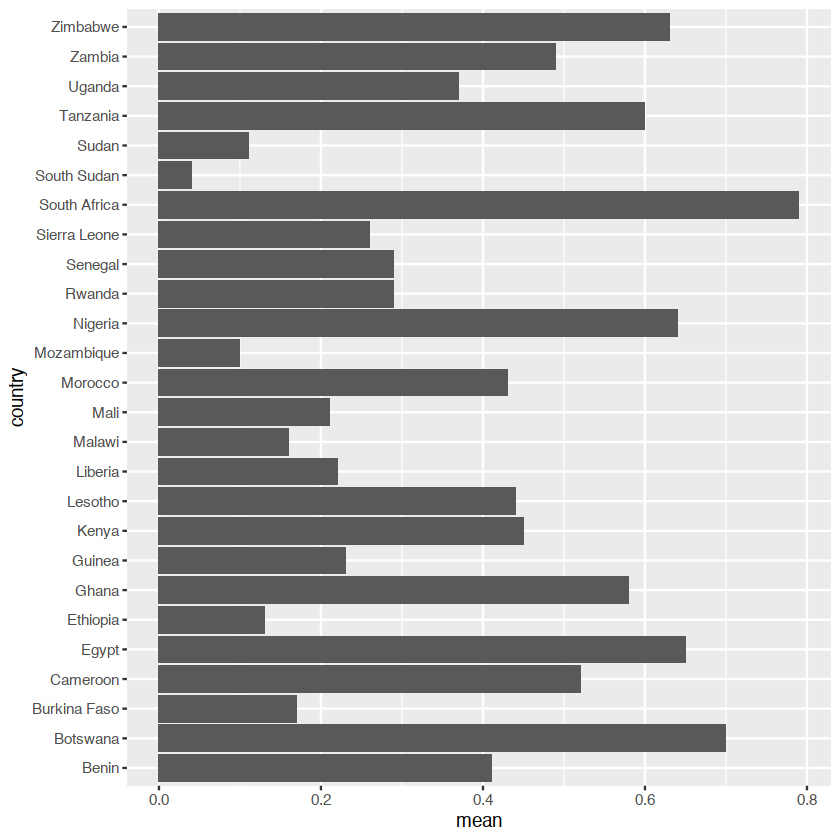

In [104]:
# Plot mean mobility by country
ggplot(mobility) +
 geom_col(aes(x = mean, y = country))

`fct_reorder` reorders factor levels by sorting along another variable.

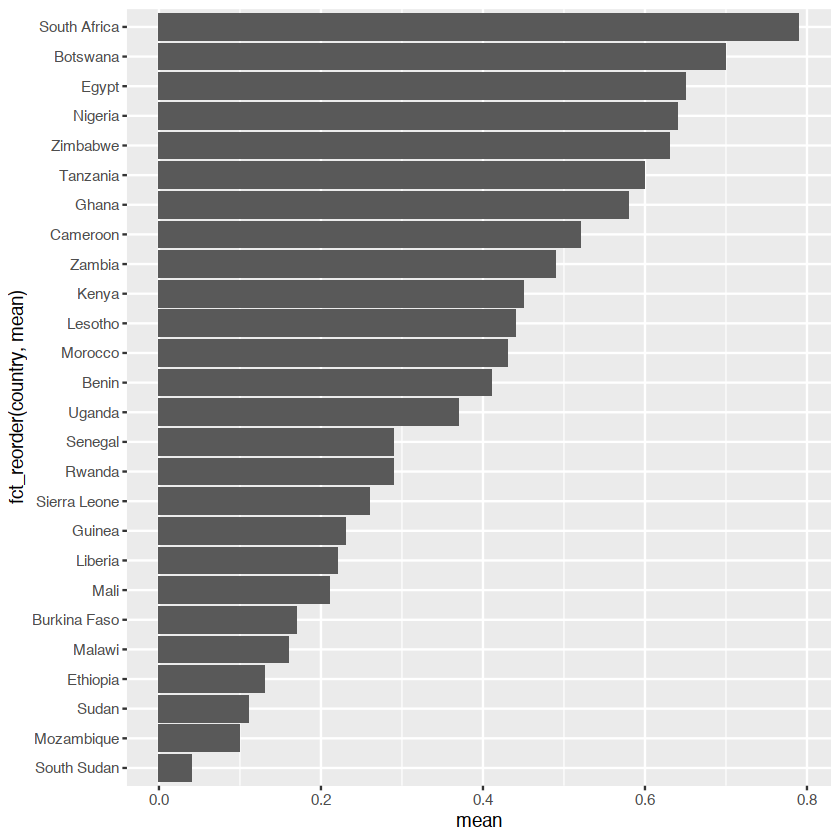

In [105]:
# Sort by mean
ggplot(mobility) +
    geom_col(aes(x = mean, y = fct_reorder(country, mean)))

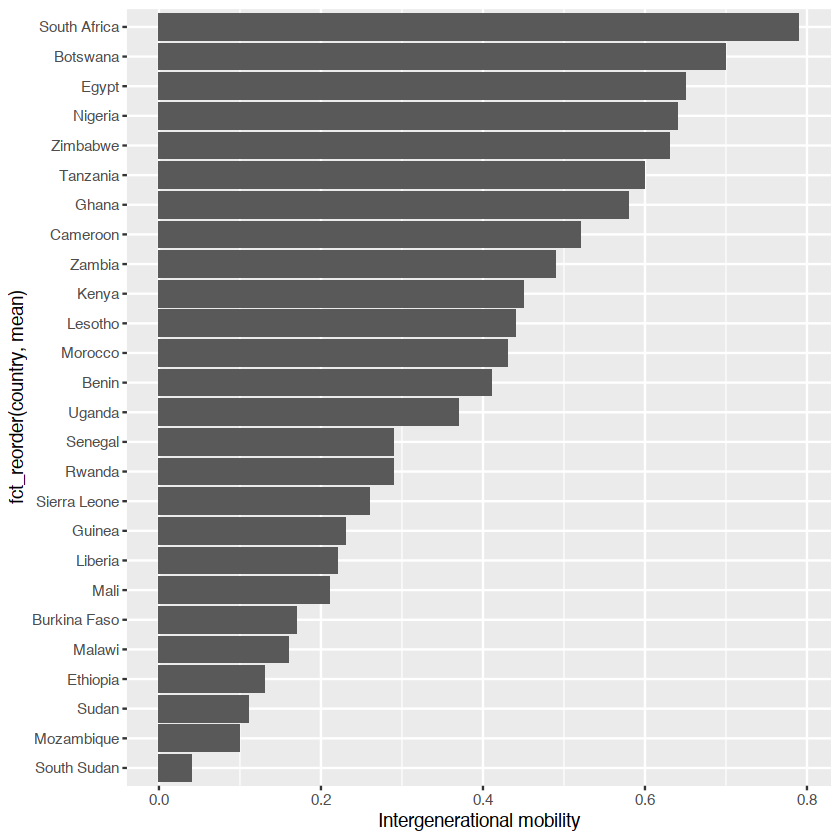

In [110]:
# Reorder countries by variable mean
ggplot(mobility) +
    geom_col(aes(x = mean, y = fct_reorder(country, mean))) +
    scale_x_continuous("Intergenerational mobility") 

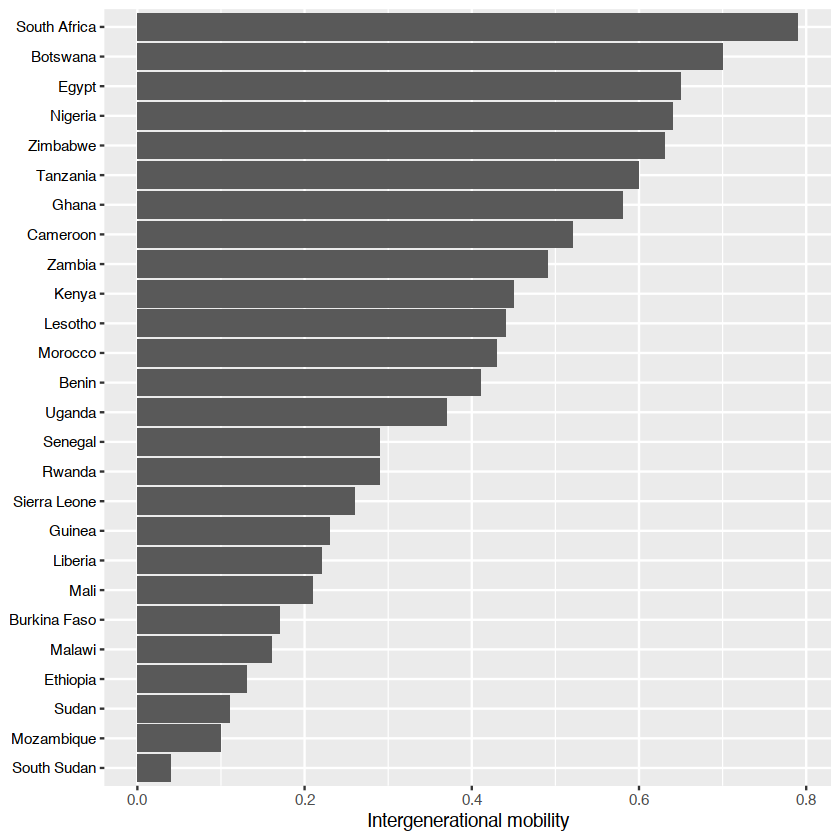

In [111]:
# Relabel axes
ggplot(mobility) +
    geom_col(aes(x = mean, y = fct_reorder(country, mean))) +
    labs(x = "Intergenerational mobility") +
    theme(axis.title.y = element_blank(), 
          axis.text.y = element_text(colour="black"))

### Stop-and-frisk

In [124]:
# Load data
load('sqf.Rdata')

In [120]:
head(hitrate_by_precinct, 10)

precinct,black,white
<fct>,<dbl>,<dbl>
1,0.10958904,0.2629758
5,0.05916473,0.2324723
6,0.06959707,0.2063492
7,0.03006088,0.1574803
9,0.05050505,0.2421991
10,0.08028674,0.1842697
13,0.15961306,0.4484211
14,0.19495091,0.4161926
17,0.21428571,0.3491525


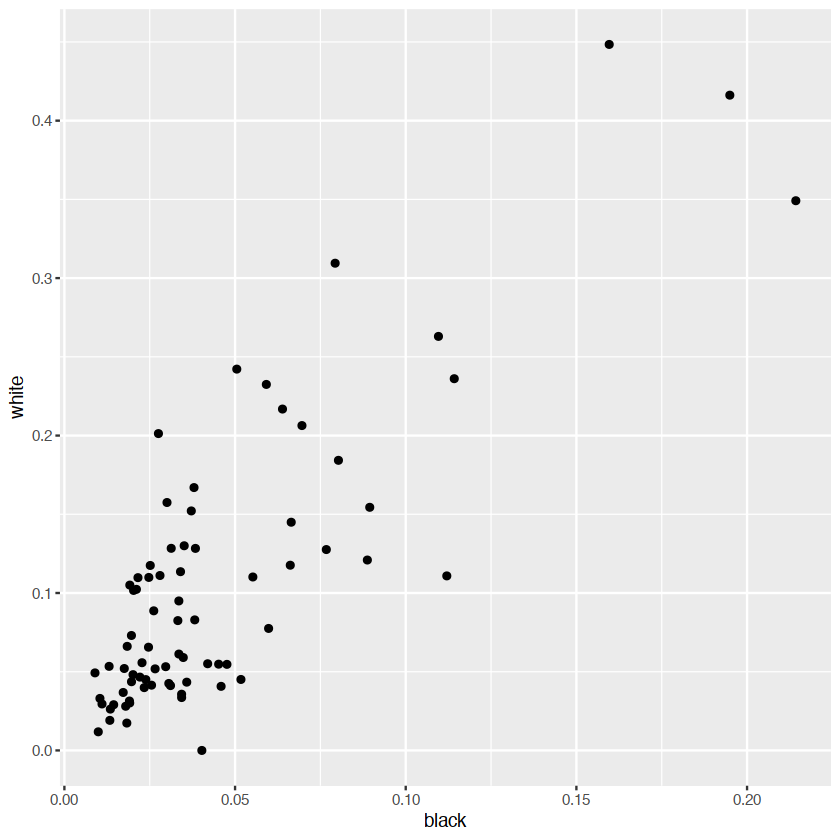

In [97]:
# Plot hit rates
ggplot(data = hitrate_by_precinct) +
    geom_point(aes(x = black, y = white))

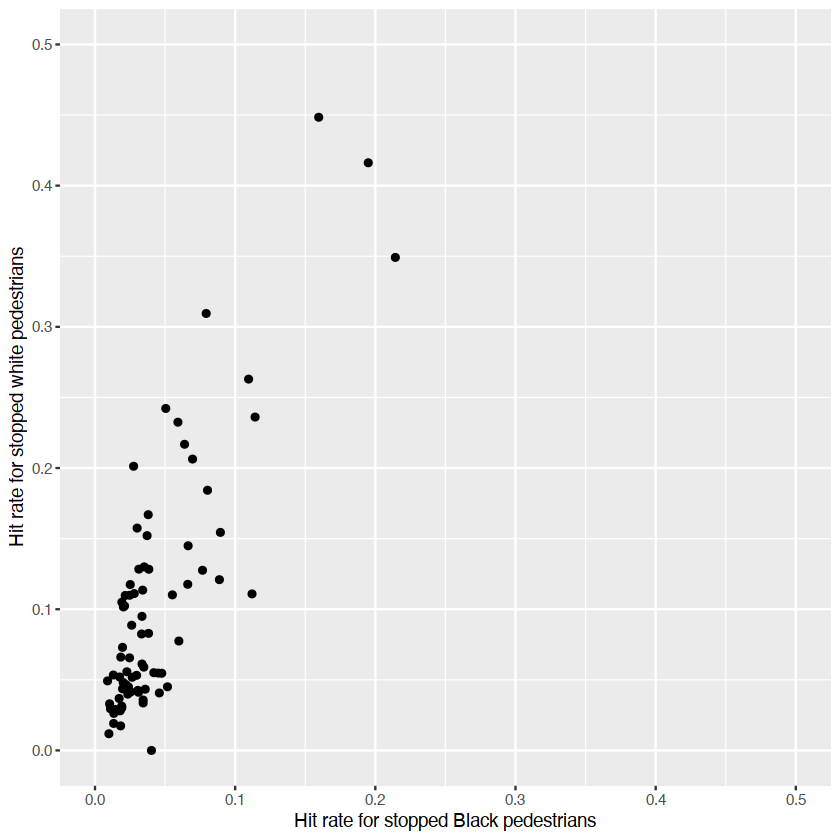

In [95]:
# Modify axes
ggplot(data = hitrate_by_precinct) +
    geom_point(aes(x = black, y = white)) +
    labs(x = 'Hit rate for stopped Black pedestrians',
         y = 'Hit rate for stopped white pedestrians') +
    coord_cartesian(xlim = c(0, 0.5), ylim = c(0, 0.5)) 

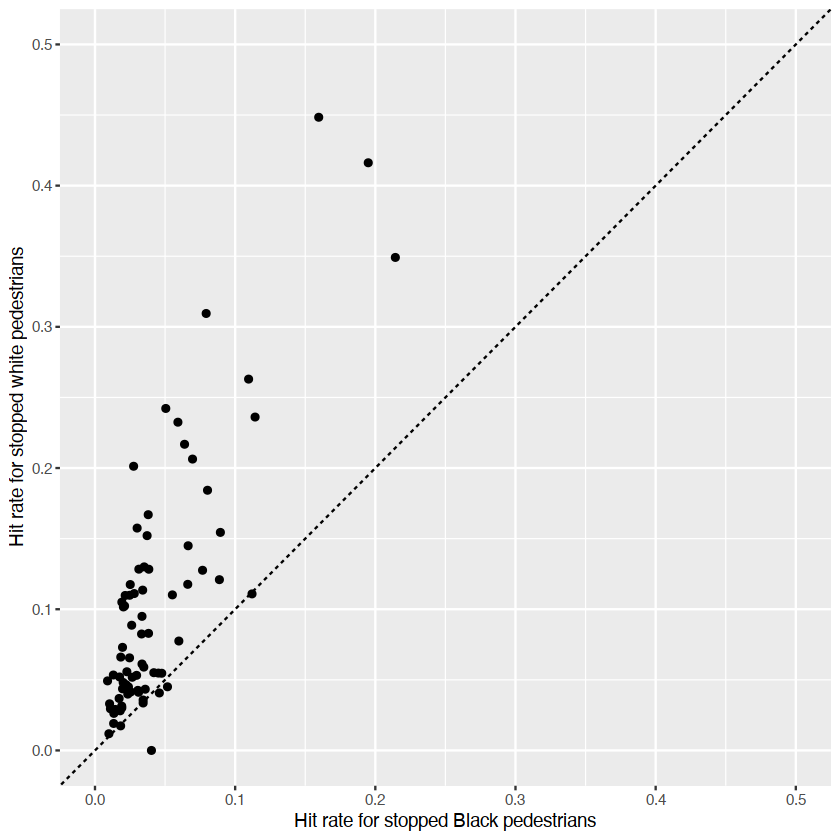

In [102]:
# Add dashed 45 degree line (y = x)
ggplot(data = hitrate_by_precinct) +
    geom_point(aes(x = black, y = white)) +
    labs(x = "Hit rate for stopped Black pedestrians",
         y = "Hit rate for stopped white pedestrians") +
    coord_cartesian(xlim = c(0, 0.5), ylim = c(0, 0.5)) +
    geom_abline(slope = 1, intercept = 0, linetype = "dashed") 

## Exercises

### Exercise 1: The relationship between CO2 emissions and GDP

Today we are going to use data from the World Bank’s World Development Indicators (WDI). `wdi` contains the GDP and population data for 1994 and 2019; and `wdi_advars` includes five other variables:

* CO2: CO2 emissions (metric tons per capita)
* CHE: Mortality rate, infant (per 1,000 live births)
* ALITRT: Current health expenditure (% of GDP)
* IMRT: Literacy rate, adult total (% of people ages 15 and above)
* PARL: Proportion of seats held by women in national parliaments (%) 

0. Run the code below to load packages and datasets.

In [38]:
library(tidyverse)
library(readxl)

wdi <- read_excel("WDI Data Extract.xlsx", 
                  sheet = 2)

wdi_advars <- read_excel("WDI Data Extract.xlsx", 
                         sheet = 3)

1. Sometimes we need to combine information from two different datasets. We can use the `left_join` function to join two datasets by one or more common key variables. The syntax is: `left_join(dataset1, dataset2, by = "ID")` where `ID` is a "key" variable present in both datasets. Merge `wdi` and `wdi_advars` using `Country` as the key variable.

In [8]:
# Your answer here!

# START

wdi_all <- left_join(wdi, wdi_advars, by = "Country")

# END

2. Examine the first 10 rows of the data. 

HINT: Remember that you can use `head(data, n)` to print the first `n` rows of a dataset.

In [39]:
# Your answer here!

# START
head(wdi_all, 10)
# END

Country,GDP_1994,GDP_2019,POP_1994,POP_2019,CO2_2016,CHE_2017,ALITRT_2018,IMRT_2018,PARL_2019,GDP_2016,GDP_2017,GDP_2018,POP_2016,POP_2017,POP_2018,CO2_total_2016
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,NA,21739593382,17075727,38041754,0.2451014,11.777194,43.01972,47.9,27.86885,20206376461,20744935406,21126660586,35383128,36296400,37172386,8672455
Albania,4791372056,14868516511,3207536,2854191,1.5771626,NA,98.14115,7.8,29.50820,13465406060,13977387391,14546448944,2876101,2873457,2866376,4536079
Algeria,89791622831,202805017529,28213774,43053054,3.6991560,6.374322,81.40784,20.1,25.75758,195871280745,198417607392,201195453898,40551404,41389198,42228429,150005969
American Samoa,NA,NA,52095,55312,NA,NA,NA,NA,NA,534555066,503259912,514255507,55741,55620,55465,NA
Andorra,2024227689,3539838261,62677,77142,6.0723702,10.320552,NA,2.7,46.42857,3409412701,3421211719,3475566751,77297,77001,77006,469376
Angola,23311735184,98769677172,13503747,31825295,1.2028606,2.791500,NA,51.6,30.00000,101822893033,101673002180,99635905543,28842484,29816748,30809762,34693487
Antigua and Barbuda,804286308,1525046720,67204,97118,5.8965587,4.533532,NA,5.0,11.11111,1315622165,1357005634,1457277456,94527,95426,96286,557384
Argentina,274830720367,437215091207,34402672,44938712,4.6190855,9.124315,99.00387,8.8,40.15748,446342760088,458253820043,446880911358,43590368,44044811,44494502,201347636
Armenia,3137842747,13996188673,3283667,2957731,1.7559760,10.362705,NA,11.0,23.48485,11501998665,12364648565,13007610290,2936146,2944809,2951776,5155802


3. CO2 emissions, per capita (metric tons) are measured as the total amount of carbon dioxide emitted by the country as a consequence of all relevant human (production and consumption) activities, divided by the population of the country. Suppose that we are interested in identifying the countries with the highest number of emissions. Use the `mutate` function to create a new variable with total number of CO2 emissions. Call the new dataset `wdi_all`. Note that this will overwrite the previous dataset. Then print out the first few rows of the dataset.

In [10]:
# Your answer here!

# START
wdi_all <- wdi_all %>% 
    mutate(CO2_total_2016 = CO2_2016 * POP_2016)

head(wdi_all)

# END

Country,GDP_1994,GDP_2019,POP_1994,POP_2019,CO2_2016,CHE_2017,ALITRT_2018,IMRT_2018,PARL_2019,GDP_2016,GDP_2017,GDP_2018,POP_2016,POP_2017,POP_2018,CO2_total_2016
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,NA,21739593382,17075727,38041754,0.2451014,11.777194,43.01972,47.9,27.86885,20206376461,20744935406,21126660586,35383128,36296400,37172386,8672455
Albania,4791372056,14868516511,3207536,2854191,1.5771626,NA,98.14115,7.8,29.50820,13465406060,13977387391,14546448944,2876101,2873457,2866376,4536079
Algeria,89791622831,202805017529,28213774,43053054,3.6991560,6.374322,81.40784,20.1,25.75758,195871280745,198417607392,201195453898,40551404,41389198,42228429,150005969
American Samoa,NA,NA,52095,55312,NA,NA,NA,NA,NA,534555066,503259912,514255507,55741,55620,55465,NA
Andorra,2024227689,3539838261,62677,77142,6.0723702,10.320552,NA,2.7,46.42857,3409412701,3421211719,3475566751,77297,77001,77006,469376
Angola,23311735184,98769677172,13503747,31825295,1.2028606,2.791500,NA,51.6,30.00000,101822893033,101673002180,99635905543,28842484,29816748,30809762,34693487


4. Identify the five countries with the most CO2 emissions in 2016 and their respective levels of CO2 emissions in 2016 using `head` and the tidyverse function `arrange`. 

HINT 1: Make sure to arrange by CO2 emissions before using `head`! Why does this make a difference?

HINT 2: Because you want to string together several tidyverse functions, it will help to use the pipe `%>%`.

In [40]:
# Your answer here!

# START
wdi_all %>%
    arrange(desc(CO2_total_2016)) %>%
    select(Country, CO2_total_2016) %>%
    head(5)
# END

Country,CO2_total_2016
<chr>,<dbl>
China,9893037952
United States,5006302077
India,2407671526
Russian Federation,1732026776
Japan,1135886253


5. Now identify the five countries with the largest GDP in 2016 and their respective GDP in 2016.

In [42]:
# Your answer here!

# START
wdi_all %>%
    arrange(desc(GDP_2016)) %>%
    select(Country, GDP_2016) %>%
    head(5)
# END

Country,GDP_2016
<chr>,<dbl>
United States,1.697235e+13
China,9.523765e+12
Japan,6.019927e+12
Germany,3.784710e+12
France,2.811756e+12


6. Use the `mean` function to calculate the average number of CO2 emissions per capita in 2016. What does this function return?

In [44]:
# Your answer here!

# START
mean(wdi_all$CO2_2016)
# END

[1] NA

7. Calculate the mean using the argument na.rm = TRUE to remove missing values.

In [45]:
# Your answer here!

# START
mean(wdi_all$CO2_2016, na.rm = TRUE)
# END

[1] 4.795234

8. Calculate the median level of C02 emissions per capita in 2016. What drives the differences between your result for the mean and the median?

In [77]:
# Your answer here!

# START
median(wdi_all$CO2_2016, na.rm = TRUE)
# END

[1] 2.685654

9. What is the total GDP of all countries with C02 emissions per capita above the world median calculated in part (7)? What fraction of the total world GDP does this number represent? What does this result suggest?

Let's take this one step at a time:

9.1. Use `mutate` to create 3 columns: 

    (1) Median CO2 emissions per capita. 
    
    (2) A binary variable that flags whether CO2_2016 is above median C02 emissions per capita. 
    
    (3) A variable called gdp_above that is equal to a country's GDP if its number of C02 emissions per capita is above the median and 0 otherwise. 
    
9.2. Use `summarize` and `sum` to sum total GDP and GDP of countries with CO2 per capita emissions above median. 

9.3. Use `mutate` again to calculate the fraction of world GDP produced in countries with above-median C02 emissions per capita. 

In [74]:
# Your answer here!

# START
wdi_all %>% 
    mutate(
        # Calculate the median level of world CO2 emissions per capita
        median_CO2 = median(CO2_2016, na.rm = TRUE),
        # Flag countries above average world CO2 emissions per capita
        above_world_median = CO2_2016 > median_CO2,
        # Zero-out GDP of countries above median CO2 emissions per capita
        gdp_above = ifelse(above_world_median, GDP_2016, 0)
    ) %>%
    summarize(
        # Sum up GDP of countries above median CO2 emissions per capita
        gdp_above = sum(gdp_above, na.rm = TRUE),
        # Sum up entire world GDP
        gdp_tot = sum(GDP_2016, na.rm = TRUE)) %>%
    # Calculate share of GDP in countries above median CO2 emissions per capita
    mutate(share_above = gdp_above / gdp_tot)
# END

gdp_above,gdp_tot,share_above
<dbl>,<dbl>,<dbl>
6.197767e+13,7.678461e+13,0.8071627


10. Suppose that we are interested in understanding the relationship between GDP per capita and CO2 emissions per capita emissions. Use the `mutate` function to calculate the GDP per capita per country in 2016.

In [47]:
# Your answer here!

# START
wdi_all <- wdi_all %>%
    mutate(gdp_percap_2016 = GDP_2016 / POP_2016)
# END

11. Use a graph to observe the association between GDP per capita (x axis) and C02 emissions per capita (y axis).

Warning message:
“Removed 30 rows containing missing values (geom_point).”


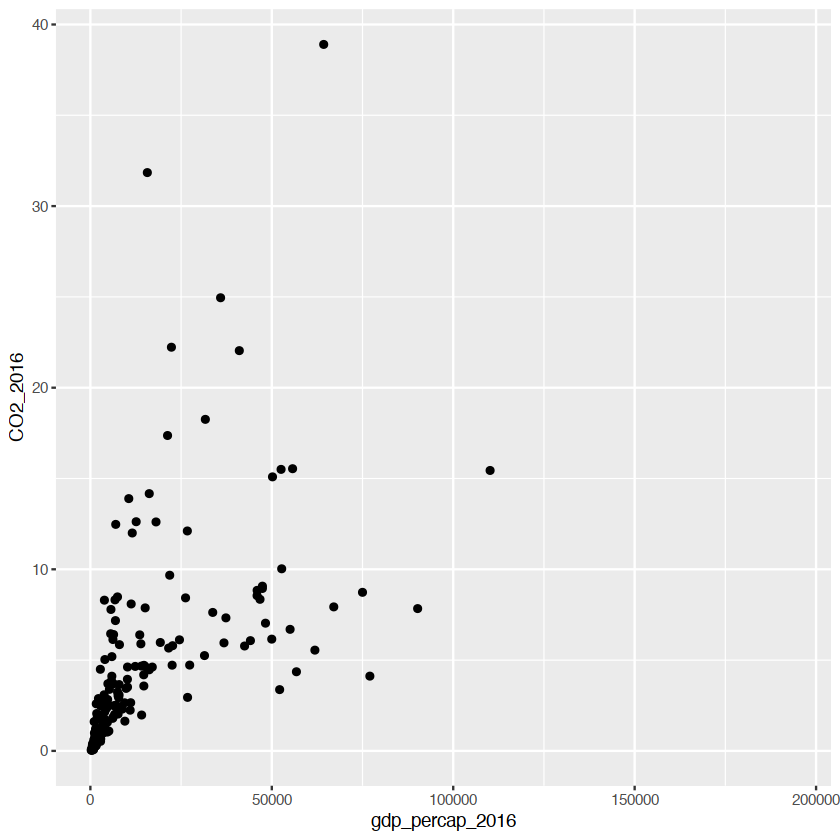

In [76]:
# Your answer here!

# START
ggplot(wdi_all)+
    geom_point(aes(x=gdp_percap_2016, y=CO2_2016))
# END

12. Use the `cor` function to compute the correlation between both variables. Remember to deal with the missing values.

HINT: To only use observations with non-missing values of GDP per capita and C02 per capita, add the argument `use = "complete.obs"`.

In [73]:
# Your answer here!

# START
cor(wdi_all$gdp_percap_2016,
    wdi_all$CO2_2016, 
    use = "complete.obs")
# END

[1] 0.5651309

### Exercise 2: Measures of central tendency and dealing with missing values

1. How many countries are in the data? How many have missing values for 2016 GDP? Use the function `is.na()`.

In [56]:
# Your answer here!

# START
nrow(wdi_all)
sum(is.na(wdi_all$GDP_2016))
# END

[1] 217

[1] 19

2. Calculate the mean, variance, and standard deviation of 2016 GDP using the formulas we studied in class.

HINT: There are 198 non-missing observations of GDP.

In [67]:
# Your answer here!

# START
# Calculate sample size without NAs
n <- nrow(wdi_all) - sum(is.na(wdi_all$GDP_2016))

# Calculate mean
mean <- sum(wdi_all$GDP_2016, na.rm=TRUE) / n

# Calculate variance
var <- sum((wdi_all$GDP_2016 - mean)^2, na.rm=TRUE) / (n - 1)

# Calculate standard deviation
sd <- sqrt(var)

# Report statistics
c(n = n, mean = mean, variance = var, sd = sd)
# END

n         mean     variance           sd 
1.980000e+02 3.878010e+11 2.297857e+24 1.515868e+12

2. Now use the functions `sd()` and `var()` to calculate the standard deviation and variance of GDP. Do the results you obtain using these functions match your “manual” calculations?

In [69]:
# Your answer here!

# START
var(wdi_all$GDP_2016, na.rm=TRUE)
sd(wdi_all$GDP_2016, na.rm=TRUE)
# END

[1] 2.297857e+24

[1] 1.515868e+12

4. One of the countries with missing values is Bermuda. Imagine that you are told that new data has arrived and the value is 30. Create a new dataset that incorporates the updated value. How does this change the mean of GDP?

In [72]:
# Your answer here!

# START
wdi_all_updated <- mutate(wdi_all, GDP_2016_updated = ifelse(Country == "Bermuda", 30, GDP_2016))
# END

In [70]:
# Your answer here!

# START
mean(wdi_all_updated$GDP_2016_updated, na.rm = TRUE)
# END

[1] 385852291798

In [52]:
# Your answer here!

# START
mean(wdi_all$GDP_2016, na.rm=TRUE)
# END

[1] 3.87801e+11